In [2]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
def normalize_samples(samples_raw):
    mod = [s - s.min() for s in samples_raw]
    mod = [(s / s.max()).T for s in mod]
    
    min_len = 48
    normalized = []

    for s in mod:
        if s.shape[1] % min_len == 0:
            normalized += [s[:, min_len * i:min_len * (i + 1)] for i in range(s.shape[1] // min_len)]
        else:
            normalized += [s[:, min_len * i:min_len * (i + 1)] for i in range(s.shape[1] // min_len + 1)]
            normalized[-1] = np.pad(normalized[-1], ((0, 0), (0, min_len - s.shape[1] % min_len)), 'constant')
    return np.array(normalized)

In [3]:
model = load_model('model_22.h5')

Для тестирования необходимо указать путь до зашумленной mel-спектограммы.
Здесь приведён пример с визуализацией зашумленного, чистого и предсказанного нейросетью кусочка mel-спектограммы.

In [9]:
x_test = np.load('C:/Users/a.aspidov/Desktop/attachments/val/val/noisy/82/82_121544_82-121544-0008.npy')
y_test = np.load('C:/Users/a.aspidov/Desktop/attachments/val/val/clean/82/82_121544_82-121544-0008.npy')

1/1 [==============================] - 6s 6s/step


<IPython.core.display.Javascript object>


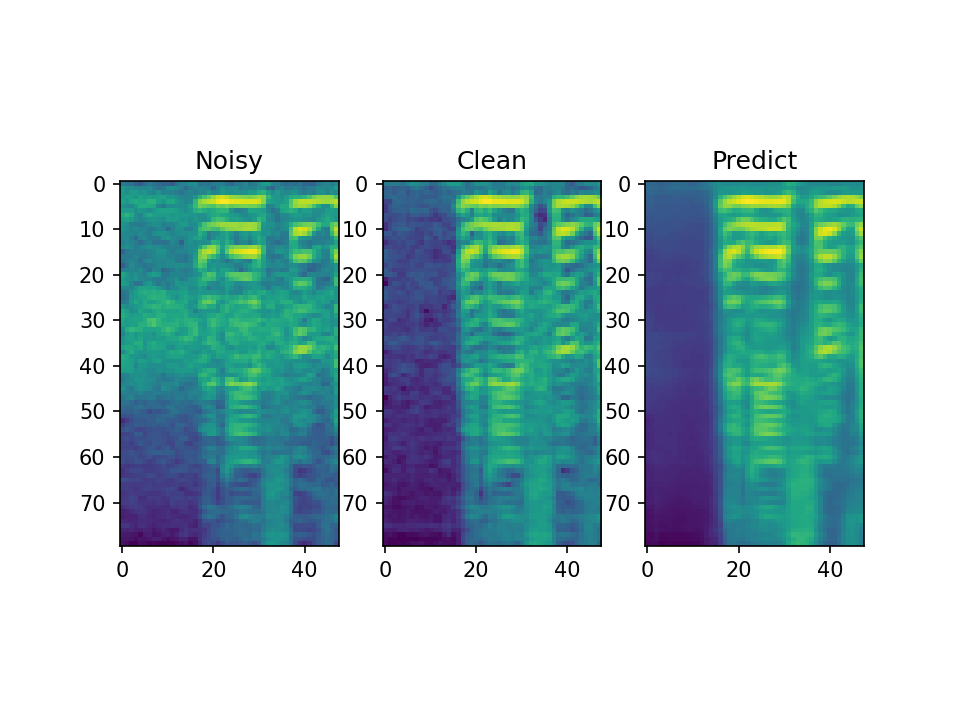

Text(0.5, 1.0, 'Predict')

In [10]:
x_test = normalize_samples([x_test])
y_test = normalize_samples([y_test])
x_test = x_test[..., np.newaxis]
y_pred = model.predict(x_test)

fig, axs = plt.subplots(1, 3)
axs[0].imshow(np.asarray(255 * x_test[0], dtype=np.uint8))
axs[0].set_title('Noisy')
axs[1].imshow(np.asarray(255 * y_test[0], dtype=np.uint8))
axs[1].set_title('Clean')
axs[2].imshow(np.asarray(255 * y_pred[0], dtype=np.uint8))
axs[2].set_title('Predict')